In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_63e3ca5aa82d47679bb246909e977782 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2ijAbgxqfPPb2UORERpwSuv9KAgitt-O-_9pSQNZGiWJ',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_63e3ca5aa82d47679bb246909e977782.get_object(Bucket='winequality-donotdelete-pr-jvqb0rpuecmney',Key='Wine.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
# df_data_1.head()



In [3]:
df_data_1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [4]:
X = df_data_1.iloc[:, 0:-1].values
y = df_data_1.iloc[:, -1].values


In [5]:
# import seaborn as sns
# #%matplotlib inline
# sns.set_palette("GnBu_d")
# sns.set_style('whitegrid')

# sns.pairplot(df_data_1)


In [6]:
# df_data_1.hist(bins = 10 , figsize = (10,10))

In [7]:
# corr_matrix = df_data_1.corr()
# fig, ax = plt.subplots(figsize = (10,10))
# sns.heatmap(corr_matrix,annot = True, linewidths = 5, ax=ax)
# plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
classifier2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [11]:
# Predicting the Test set results
y_pred1= classifier2.predict(X_test)
y_pred1

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 1,
       3, 2, 3, 1, 3, 3, 1, 3])

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.93617021276595747

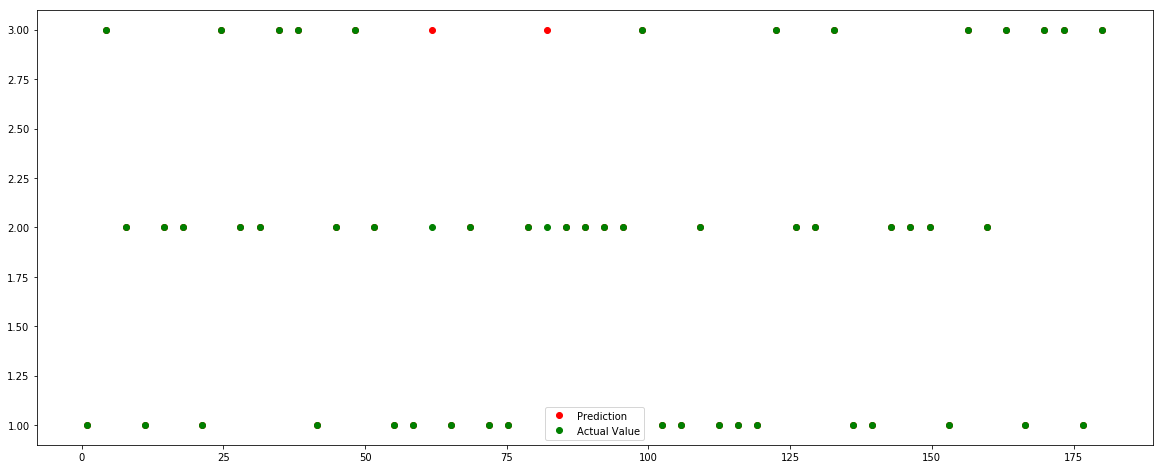

In [13]:
plt.figure(figsize = (20,8))
domain = np.linspace(1,180,len(y_pred1))
plt.plot(domain, y_pred1, 'o', color='red')
plt.plot(domain, y_test, 'o', color='green')
plt.legend(("Prediction","Actual Value"))
plt.show()

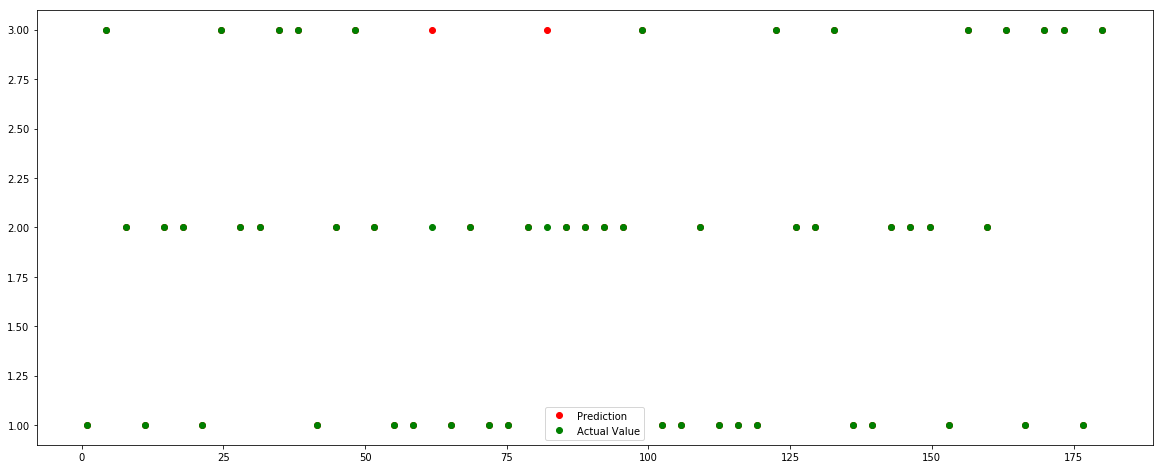

In [14]:
plt.figure(figsize = (20,8))
domain = np.linspace(1,180,len(y_pred1))
plt.plot(domain, y_pred1, 'o', color='red')
plt.plot(domain, y_test, 'o', color='green')
plt.legend(("Prediction","Actual Value"))
plt.show()


In [15]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient
wml_credentials={
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "apikey": "d-jw8MCJIsEIISQ9o7oQgTZ8jIykI7_yncPVlk0tjn6y",
    "username": "76eae79b-45c1-4bd7-95e0-0cf03a495ce4",
    "instance_id": "a3e33d7f-f05a-4255-9e9a-7bfb357bfd33",
    "password": "9c0c668c-1b7b-4897-901a-9f0ec2e30ed1",
}

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-05-23 05:58:11,308 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [16]:
client=WatsonMachineLearningAPIClient(wml_credentials)
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:"Apoorav",
             client.repository.ModelMetaNames.AUTHOR_EMAIL:"apooravnigam@outlook.com",
             client.repository.ModelMetaNames.NAME:"WineQuality"}
model_artifact=client.repository.store_model(classifier2,meta_props=model_props)


published_model_uid=client.repository.get_model_uid(model_artifact)
published_model_uid
deploy=client.deployments.create(published_model_uid,name="Customer_Segment")



#######################################################################################

Synchronous deployment creation for uid: '20f2f034-8ccf-4ff3-abb1-e0bea191fc41' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='edf5048e-9d7a-44ba-b075-67d3ea954c2e'
------------------------------------------------------------------------------------------------




In [17]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [18]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/a3e33d7f-f05a-4255-9e9a-7bfb357bfd33/deployments/edf5048e-9d7a-44ba-b075-67d3ea954c2e/online'